In [1]:
1+1

2

In [2]:
include("src/gravlens.jl");

In [3]:
const mvir = 200.0
const rscale = 10.0
const rvir = 200.0
const GC = G/C/C
m(r) = tnfw_m(mvir, rscale, r, rvir);
rho(r) = tnfw_ρ(mvir, rscale, r, rvir);
vc2(r) = G*m(r)/r
pressure(r) = 0.5*rho(r)*vc2(r);
A(r) = 1./(1-2*GC*m(r)/r);
function calc_tr_un(r)
    a,b = quadgk(r->sqrt(A(r))/r,rvir,r, reltol=1e-27, abstol=1.0e-27)
    exp(a)
end
function calc_tr_sch(r)
    sr = sqrt(r)
    (0.5*(sr+sqrt(r-4*(GC*mvir/2))))^2
end
const r_fac = calc_tr_sch(200.0e7)/calc_tr_un(200.0e7)
function calc_tr(r)
    r_fac.*calc_tr_un(r)
end
b_integrand(r) = 2*GC/r/r*(m(r)+4*π*r*r*r*pressure(r)/C/C)*A(r);
B(r) = exp(-quadgk(b_integrand, r, 1.0e10, reltol=1e-18, abstol=1e-18)[1]);

In [4]:
r = 10.^linspace(log10(0.1), log10(5.0e6), 1000);
tr = open("tr.data","r") do f
    tr = zeros(1000)
    read!(f, tr)
    tr
end;
# tr = [Float64(calc_tr(big(ri))) for ri in r];
# open("tr.data","w") do f
#    write(f, tr)
# end;

In [5]:
const spl = Spline1D(tr, r, k=5, bc="error");
fast_r(tr) = evaluate(spl, tr);

In [6]:
function Ltr(tr)
    const r = fast_r(tr)    
    const g = r.*r./tr./tr
    const f = B(r)
    Float64(sqrt(g./f))
end

Ltr (generic function with 1 method)

In [7]:
r = 10.^linspace(log10(1.0), log10(4.99e6), 1000);
_ltr = zeros(length(r))
for i in 1:length(r)
    display("i="*string(i)*" r="*string(r[i]))
    _ltr[i] = Float64(Ltr(big(r[i])))
end;
#_ltr = [Float64(Ltr(big(ri))) for ri in r];

"i=1 r=1.0"

"i=2 r=1.0155581723640217"

"i=3 r=1.031358401455352"

"i=4 r=1.0474044532342763"

"i=5 r=1.063700152252539"

"i=6 r=1.0802493825649202"

"i=7 r=1.0970560886549934"

"i=8 r=1.1141242763752872"

"i=9 r=1.131458013902075"

"i=10 r=1.149061432705017"

"i=11 r=1.1669387285318915"

"i=12 r=1.185094162408643"

"i=13 r=1.2035320616549927"

"i=14 r=1.2222568209158475"

"i=15 r=1.2412729032087575"

"i=16 r=1.260584840987669"

"i=17 r=1.280197237223228"

"i=18 r=1.3001147664998913"

"i=19 r=1.3203421761301066"

"i=20 r=1.3408842872858262"

"i=21 r=1.3617459961476275"

"i=22 r=1.3829322750717088"

"i=23 r=1.4044481737750432"

"i=24 r=1.4262988205389708"

"i=25 r=1.4484894234315169"

"i=26 r=1.471025271548727"

"i=27 r=1.493911736275314"

"i=28 r=1.5171542725649203"

"i=29 r=1.5407584202402973"

"i=30 r=1.5647298053137138"

"i=31 r=1.5890741413279066"

"i=32 r=1.6137972307178958"

"i=33 r=1.6389049661939858"

"i=34 r=1.6644033321462832"

"i=35 r=1.690298406071067"

"i=36 r=1.7165963600193521"

"i=37 r=1.7433034620679853"

"i=38 r=1.7704260778136347"

"i=39 r=1.7979706718900184"

"i=40 r=1.8259438095087392"

"i=41 r=1.8543521580240947"

"i=42 r=1.883202488522229"

"i=43 r=1.9125016774350125"

"i=44 r=1.9422567081790272"

"i=45 r=1.972474672820054"

"i=46 r=2.0031627737634556"

"i=47 r=2.034328325470859"

"i=48 r=2.0659787562035468"

"i=49 r=2.0981216097929685"

"i=50 r=2.1307645474388064"

"i=51 r=2.163915349535006"

"i=52 r=2.197581917524224"

"i=53 r=2.231772275781123"

"i=54 r=2.266494573524971"

"i=55 r=2.3017570867619925"

"i=56 r=2.337568220257944"

"i=57 r=2.3739365095413767"

"i=58 r=2.410870622938065"

"i=59 r=2.4483793636370925"

"i=60 r=2.486471671789072"

"i=61 r=2.5251566266370236"

"i=62 r=2.564443448680394"

"i=63 r=2.60434150187275"

"i=64 r=2.6448602958536616"

"i=65 r=2.6860094882153103"

"i=66 r=2.727798886804362"

"i=67 r=2.7702384520596506"

"i=68 r=2.8133382993862353"

"i=69 r=2.85710870156639"

"i=70 r=2.9015600912081063"

"i=71 r=2.9467030632316886"

"i=72 r=2.992548377395038"

"i=73 r=3.0391069608582235"

"i=74 r=3.086389910787954"

"i=75 r=3.1344084970025703"

"i=76 r=3.1831741646581904"

"i=77 r=3.2326985369766437"

"i=78 r=3.2829934180158475"

"i=79 r=3.334070795483287"

"i=80 r=3.3859428435932664"

"i=81 r=3.438621925968617"

"i=82 r=3.492120598587541"

"i=83 r=3.546451612776316"

"i=84 r=3.601627918248553"

"i=85 r=3.657662666191737"

"i=86 r=3.7145692124017957"

"i=87 r=3.7723611204664307"

"i=88 r=3.8310521649979807"

"i=89 r=3.8906563349165793"

"i=90 r=3.9511878367843845"

"i=91 r=4.0126610981917015"

"i=92 r=4.075090771195772"

"i=93 r=4.13849173581307"

"i=94 r=4.202879103565931"

"i=95 r=4.268268221084353"

"i=96 r=4.3346746737638595"

"i=97 r=4.402114289480238"

"i=98 r=4.470603142362096"

"i=99 r=4.540157556622102"

"i=100 r=4.610794110447843"

"i=101 r=4.6825296399532075"

"i=102 r=4.75538124319124"

"i=103 r=4.829366284229446"

"i=104 r=4.904502397288482"

"i=105 r=4.980807490945254"

"i=106 r=5.058299752401391"

"i=107 r=5.13699765181814"

"i=108 r=5.2169199467187015"

"i=109 r=5.298085686459054"

"i=110 r=5.380514216768342"

"i=111 r=5.464225184359892"

"i=112 r=5.54923854161399"

"i=113 r=5.6355745513334945"

"i=114 r=5.723253791573436"

"i=115 r=5.812297160545775"

"i=116 r=5.9027258816004595"

"i=117 r=5.994561508283974"

"i=118 r=6.087825929476586"

"i=119 r=6.182541374609542"

"i=120 r=6.278730418963413"

"i=121 r=6.376415989048872"

"i=122 r=6.4756213680712005"

"i=123 r=6.576370201479794"

"i=124 r=6.678686502604031"

"i=125 r=6.78259465837681"

"i=126 r=6.88811943514713"

"i=127 r=6.995285984583118"

"i=128 r=7.104119849666886"

"i=129 r=7.214646970782672"

"i=130 r=7.326893691899676"

"i=131 r=7.440886766851116"

"i=132 r=7.556653365710952"

"i=133 r=7.674221081269849"

"i=134 r=7.793617935611855"

"i=135 r=7.914872386793434"

"i=136 r=8.038013335626403"

"i=137 r=8.163070132566384"

"i=138 r=8.29007258470845"

"i=139 r=8.419050962891594"

"i=140 r=8.550036008913743"

"i=141 r=8.683058942859018"

"i=142 r=8.818151470538979"

"i=143 r=8.955345791049675"

"i=144 r=9.09467460444624"

"i=145 r=9.236171119536907"

"i=146 r=9.379869061798264"

"i=147 r=9.525802681413674"

"i=148 r=9.674006761436768"

"i=149 r=9.824516626081913"

"i=150 r=9.977368149143697"

"i=151 r=10.13259776254737"

"i=152 r=10.290242465032383"

"i=153 r=10.450339830970933"

"i=154 r=10.612928019323782"

"i=155 r=10.778045782735378"

"i=156 r=10.945732476770488"

"i=157 r=11.11602806929456"

"i=158 r=11.288973149999949"

"i=159 r=11.464608940080456"

"i=160 r=11.642977302056334"

"i=161 r=11.824120749752119"

"i=162 r=12.008082458429769"

"i=163 r=12.194906275079406"

"i=164 r=12.384636728870175"

"i=165 r=12.577319041763733"

"i=166 r=12.772999139292786"

"i=167 r=12.971723661507406"

"i=168 r=13.173539974091598"

"i=169 r=13.378496179652846"

"i=170 r=13.586641129187292"

"i=171 r=13.798024433723295"

"i=172 r=14.01269647614614"

"i=173 r=14.230708423206742"

"i=174 r=14.452112237717131"

"i=175 r=14.676960690935715"

"i=176 r=14.905307375145274"

"i=177 r=15.137206716426508"

"i=178 r=15.372713987630501"

"i=179 r=15.611885321552863"

"i=180 r=15.854777724312918"

"i=181 r=16.10144908894103"

"i=182 r=16.351958209177297"

"i=183 r=16.60636479348495"

"i=184 r=16.864729479281813"

"i=185 r=17.12711384739308"

"i=186 r=17.393580436729053"

"i=187 r=17.664192759191163"

"i=188 r=17.939015314809954"

"i=189 r=18.218113607118596"

"i=190 r=18.501554158765476"

"i=191 r=18.789404527369825"

"i=192 r=19.081733321623975"

"i=193 r=19.3786102176461"

"i=194 r=19.68010597558743"

"i=195 r=19.986292456497846"

"i=196 r=20.297242639453778"

"i=197 r=20.61303063895277"

"i=198 r=20.933731722578464"

"i=199 r=21.259422328940516"

"i=200 r=21.590180085893707"

"i=201 r=21.926083829040316"

"i=202 r=22.267213620520515"

"i=203 r=22.613650768095066"

"i=204 r=22.96547784452487"

"i=205 r=23.322778707252127"

"i=206 r=23.685638518387492"

"i=207 r=24.054143765008465"

"i=208 r=24.428382279773427"

"i=209 r=24.808443261856358"

"i=210 r=25.194417298207373"

"i=211 r=25.586396385143978"

"i=212 r=25.98447395027822"

"i=213 r=26.388744874785083"

"i=214 r=26.7993055160172"

"i=215 r=27.216253730471458"

"i=216 r=27.639688897113086"

"i=217 r=28.06971194106231"

"i=218 r=28.5064253576498"

"i=219 r=28.949933236846235"

"i=220 r=29.400341288072"

"i=221 r=29.85775686539289"

"i=222 r=30.322288993107726"

"i=223 r=30.79404839173416"

"i=224 r=31.273147504398807"

"i=225 r=31.759700523637722"

"i=226 r=32.25382341861419"

"i=227 r=32.75563396275971"

"i=228 r=33.265251761845114"

"i=229 r=33.782798282488486"

"i=230 r=34.30839688110642"

"i=231 r=34.84217283331592"

"i=232 r=35.38425336379369"

"i=233 r=35.934767676599826"

"i=234 r=36.49384698597345"

"i=235 r=37.06162454760746"

"i=236 r=37.63823569040978"

"i=237 r=38.22381784875885"

"i=238 r=38.81851059526081"

"i=239 r=39.42245567401647"

"i=240 r=40.035797034405824"

"i=241 r=40.658680865398104"

"i=242 r=41.291255630395746"

"i=243 r=41.93367210262033"

"i=244 r=42.586083401049244"

"i=245 r=43.248645026911376"

"i=246 r=43.92151490075045"

"i=247 r=44.60485340006526"

"i=248 r=45.2988233975354"

"i=249 r=46.00359029984164"

"i=250 r=46.71932208709042"

"i=251 r=47.44618935285162"

"i=252 r=48.1843653448193"

"i=253 r=48.934026006105"

"i=254 r=49.69535001717351"

"i=255 r=50.46851883843106"

"i=256 r=51.253716753476255"

"i=257 r=52.051130913023584"

"i=258 r=52.86095137951067"

"i=259 r=53.683371172399276"

"i=260 r=54.51858631418119"

"i=261 r=55.36679587710005"

"i=262 r=56.22820203059958"

"i=263 r=57.10301008951066"

"i=264 r=57.99142856298775"

"i=265 r=58.89366920420657"

"i=266 r=59.8099470608353"

"i=267 r=60.74048052629079"

"i=268 r=61.6854913917923"

"i=269 r=62.645204899225185"

"i=270 r=63.6198497948268"

"i=271 r=64.6096583837079"

"i=272 r=65.61486658522219"

"i=273 r=66.63571398919736"

"i=274 r=67.67244391304095"

"i=275 r=68.72530345973465"

"i=276 r=69.79454357673086"

"i=277 r=70.88041911576587"

"i=278 r=71.98318889360306"

"i=279 r=73.10311575372164"

"i=280 r=74.24046662896512"

"i=281 r=75.39551260516396"

"i=282 r=76.56852898574888"

"i=283 r=77.75979535736876"

"i=284 r=78.96959565652973"

"i=285 r=80.19821823727112"

"i=286 r=81.44595593989402"

"i=287 r=82.71310616075938"

"i=288 r=83.9999709231721"

"i=289 r=85.30685694936764"

"i=290 r=86.6340757336189"

"i=291 r=87.98194361648025"

"i=292 r=89.35078186018706"

"i=293 r=90.74091672522796"

"i=294 r=92.15267954810841"

"i=295 r=93.5864068203243"

"i=296 r=95.04244026856436"

"i=297 r=96.52112693615993"

"i=298 r=98.02281926580234"

"i=299 r=99.54787518354709"

"i=300 r=101.09665818412475"

"i=301 r=102.66953741757996"

"i=302 r=104.26688777725705"

"i=303 r=105.88908998915574"

"i=304 r=107.53653070267643"

"i=305 r=109.20960258277759"

"i=306 r=110.90870440356677"

"i=307 r=112.63424114334781"

"i=308 r=114.3866240811468"

"i=309 r=116.16627089473985"

"i=310 r=117.97360576020587"

"i=311 r=119.80905945302818"

"i=312 r=121.67306945076986"

"i=313 r=123.56608003734452"

"i=314 r=125.48854240891191"

"i=315 r=127.44091478141976"

"i=316 r=129.42366249981757"

"i=317 r=131.43725814897272"

"i=318 r=133.48218166630886"

"i=319 r=135.55892045619896"

"i=320 r=137.66796950613724"

"i=321 r=139.8098315047186"

"i=322 r=141.9850169614537"

"i=323 r=144.1940443284487"

"i=324 r=146.43744012397613"

"i=325 r=148.71573905797106"

"i=326 r=151.02948415947787"

"i=327 r=153.37922690608016"

"i=328 r=155.76552735534554"

"i=329 r=158.1889542783126"

"i=330 r=160.65008529505894"

"i=331 r=163.14950701237427"

"i=332 r=165.68781516357797"

"i=333 r=168.2656147505111"

"i=334 r=170.88352018773764"

"i=335 r=173.54215544898926"

"i=336 r=176.2421542158885"

"i=337 r=178.9841600289858"

"i=338 r=181.76882644114625"

"i=339 r=184.59681717332376"

"i=340 r=187.46880627275596"

"i=341 r=190.3854782736251"

"i=342 r=193.3475283602129"

"i=343 r=196.35566253259844"

"i=344 r=199.4105977749325"

"i=345 r=202.51306222632735"

"i=346 r=205.6637953544104"

"i=347 r=208.86354813157322"

"i=348 r=212.1130832139654"

"i=349 r=215.41317512327217"

"i=350 r=218.76461043132147"

"i=351 r=222.16818794756006"

"i=352 r=225.6247189094506"

"i=353 r=229.1350271758278"

"i=354 r=232.6999494232639"

"i=355 r=236.32033534549043"

"i=356 r=239.99704785591877"

"i=357 r=243.73096329331779"

"i=358 r=247.52297163068403"

"i=359 r=251.3739766873691"

"i=360 r=255.28489634450105"

"i=361 r=259.25666276375995"

"i=362 r=263.29022260955963"

"i=363 r=267.3865372746808"

"i=364 r=271.54658310941926"

"i=365 r=275.7713516542965"

"i=366 r=280.0618498763936"

"i=367 r=284.419100409357"

"i=368 r=288.8441417971461"

"i=369 r=293.33802874156373"

"i=370 r=297.90183235364736"

"i=371 r=302.53664040896365"

"i=372 r=307.2435576068781"

"i=373 r=312.02370583386147"

"i=374 r=316.8782244308852"

"i=375 r=321.8082704649861"

"i=376 r=326.8150190050481"

"i=377 r=331.8996634018797"

"i=378 r=337.0634155726466"

"i=379 r=342.3075062897321"

"i=380 r=347.63318547408625"

"i=381 r=353.04172249314564"

"i=382 r=358.53440646338555"

"i=383 r=364.1125465575748"

"i=384 r=369.7774723168208"

"i=385 r=375.5305339674578"

"i=386 r=381.37310274287665"

"i=387 r=387.3065712103521"

"i=388 r=393.33235360296106"

"i=389 r=399.45188615666274"

"i=390 r=405.6666274526213"

"i=391 r=411.9780587648606"

"i=392 r=418.3876844133194"

"i=393 r=424.8970321224058"

"i=394 r=431.507653385127"

"i=395 r=438.2211238328878"

"i=396 r=445.0390436110348"

"i=397 r=451.9630377602547"

"i=398 r=458.9947566038961"

"i=399 r=466.13587614132126"

"i=400 r=473.38809844738273"

"i=401 r=480.75315207810314"

"i=402 r=488.2327924826811"

"i=403 r=495.8288024218943"

"i=404 r=503.54299239302065"

"i=405 r=511.3772010613666"

"i=406 r=519.3332956985104"

"i=407 r=527.4131726273628"

"i=408 r=535.6187576741554"

"i=409 r=543.9520066274531"

"i=410 r=552.414905704318"

"i=411 r=561.0094720237212"

"i=412 r=569.7377540873146"

"i=413 r=578.6018322676956"

"i=414 r=587.6038193042552"

"i=415 r=596.7458608067484"

"i=416 r=606.0301357666963"

"i=417 r=615.4588570767461"

"i=418 r=625.03427205811"

"i=419 r=634.758662996211"

"i=420 r=644.6343476846621"

"i=421 r=654.6636799777087"

"i=422 r=664.8490503512668"

"i=423 r=675.1928864726873"

"i=424 r=685.6976537793914"

"i=425 r=696.3658560664959"

"i=426 r=707.200036083598"

"i=427 r=718.2027761408298"

"i=428 r=729.3766987243471"

"i=429 r=740.7244671214016"

"i=430 r=752.2487860551246"

"i=431 r=763.9524023291964"

"i=432 r=775.8381054825426"

"i=433 r=787.9087284542161"

"i=434 r=800.1671482586232"

"i=435 r=812.6162866712594"

"i=436 r=825.2591109251023"

"i=437 r=838.0986344178543"

"i=438 r=851.1379174301787"

"i=439 r=864.3800678551111"

"i=440 r=877.8282419388266"

"i=441 r=891.4856450329162"

"i=442 r=905.3555323583895"

"i=443 r=919.441209781542"

"i=444 r=933.7460346019079"

"i=445 r=948.2734163524653"

"i=446 r=963.0268176122978"

"i=447 r=978.0097548318853"

"i=448 r=993.2257991712545"

"i=449 r=1008.6785773511541"

"i=450 r=1024.3717725174786"

"i=451 r=1040.3091251191452"

"i=452 r=1056.4944337996126"

"i=453 r=1072.9315563022976"

"i=454 r=1089.6244103900458"

"i=455 r=1106.5769747789398"

"i=456 r=1123.7932900866094"

"i=457 r=1141.2774597953069"

"i=458 r=1159.0336512299752"

"i=459 r=1177.0660965515126"

"i=460 r=1195.3790937655074"

"i=461 r=1213.977007746658"

"i=462 r=1232.8642712791413"

"i=463 r=1252.045386113145"

"i=464 r=1271.5249240378728"

"i=465 r=1291.3075279712039"

"i=466 r=1311.3979130663374"

"i=467 r=1331.8008678356432"

"i=468 r=1352.5212552919827"

"i=469 r=1373.5640141078197"

"i=470 r=1394.9341597923255"

"i=471 r=1416.6367858868366"

"i=472 r=1438.6770651788777"

"i=473 r=1461.0602509350956"

"i=474 r=1483.791678153365"

"i=475 r=1506.876764834376"

"i=476 r=1530.3210132730087"

"i=477 r=1554.1300113697932"

"i=478 r=1578.3094339627853"

"i=479 r=1602.8650441801383"

"i=480 r=1627.80269481376"

"i=481 r=1653.12832971429"

"i=482 r=1678.8479852078322"

"i=483 r=1704.9677915346883"

"i=484 r=1731.4939743104887"

"i=485 r=1758.4328560100782"

"i=486 r=1785.7908574744404"

"i=487 r=1813.574499441122"

"i=488 r=1841.7904040984215"

"i=489 r=1870.445296663786"

"i=490 r=1899.5460069867531"

"i=491 r=1929.0994711768444"

"i=492 r=1959.112733256755"

"i=493 r=1989.5929468413135"

"i=494 r=2020.5473768425147"

"i=495 r=2051.9834012011006"

"i=496 r=2083.9085126451014"

"i=497 r=2116.330320475684"

"i=498 r=2149.25655238085"

"i=499 r=2182.6950562772945"

"i=500 r=2216.6538021809547"

"i=501 r=2251.1408841066504"

"i=502 r=2286.1645219972784"

"i=503 r=2321.7330636830234"

"i=504 r=2357.854986871052"

"i=505 r=2394.5389011661605"

"i=506 r=2431.7935501228562"

"i=507 r=2469.6278133293868"

"i=508 r=2508.050708524145"

"i=509 r=2547.071393745071"

"i=510 r=2586.6991695124257"

"i=511 r=2626.9434810455723"

"i=512 r=2667.813920514225"

"i=513 r=2709.3202293247195"

"i=514 r=2751.4723004418847"

"i=515 r=2794.280180746991"

"i=516 r=2837.754073432423"

"i=517 r=2881.9043404335894"

"i=518 r=2926.7415048986777"

"i=519 r=2972.276253696825"

"i=520 r=3018.519439965332"

"i=521 r=3065.4820856964634"

"i=522 r=3113.1753843645465"

"i=523 r=3161.610703593923"

"i=524 r=3210.7995878683705"

"i=525 r=3260.753761282757"

"i=526 r=3311.485130337426"

"i=527 r=3363.005786776111"

"i=528 r=3415.3280104679766"

"i=529 r=3468.464272334509"

"i=530 r=3522.4272373219374"

"i=531 r=3577.229767419921"

"i=532 r=3632.884924727149"

"i=533 r=3689.405974564711"

"i=534 r=3746.8063886378404"

"i=535 r=3805.099848246882"

"i=536 r=3864.300247548224"

"i=537 r=3924.4216968659075"

"i=538 r=3985.4785260548542"

"i=539 r=4047.485287916323"

"i=540 r=4110.456761666568"

"i=541 r=4174.407956459435"

"i=542 r=4239.354114963775"

"i=543 r=4305.310716996506"

"i=544 r=4372.293483212208"

"i=545 r=4440.318378850113"

"i=546 r=4509.401617539393"

"i=547 r=4579.559665163673"

"i=548 r=4650.809243785608"

"i=549 r=4723.167335632615"

"i=550 r=4796.651187144505"

"i=551 r=4871.2783130841835"

"i=552 r=4947.066500712273"

"i=553 r=5024.033814026628"

"i=554 r=5102.198598067928"

"i=555 r=5181.579483292139"

"i=556 r=5262.1953900110775"

"i=557 r=5344.065532902025"

"i=558 r=5427.209425587548"

"i=559 r=5511.646885286484"

"i=560 r=5597.398037537394"

"i=561 r=5684.483320995439"

"i=562 r=5772.923492303887"

"i=563 r=5862.739631041467"

"i=564 r=5953.953144746585"

"i=565 r=6046.585774019869"

"i=566 r=6140.659597705906"

"i=567 r=6236.197038155799"

"i=568 r=6333.220866571435"

"i=569 r=6431.754208432967"

"i=570 r=6531.820549010789"

"i=571 r=6633.4437389631585"

"i=572 r=6736.648000020989"

"i=573 r=6841.457930761051"

"i=574 r=6947.8985124690425"

"i=575 r=7055.9951150937595"

"i=576 r=7165.773503294091"

"i=577 r=7277.259842579873"

"i=578 r=7390.480705548505"

"i=579 r=7505.463078218414"

"i=580 r=7622.234366461131"

"i=581 r=7740.822402533511"

"i=582 r=7861.2554517114"

"i=583 r=7983.562219026732"

"i=584 r=8107.771856109242"

"i=585 r=8233.913968134755"

"i=586 r=8362.018620881514"

"i=587 r=8492.116347896357"

"i=588 r=8624.238157772255"

"i=589 r=8758.415541539242"

"i=590 r=8894.680480170246"

"i=591 r=9033.065452203626"

"i=592 r=9173.603441484509"

"i=593 r=9316.3279450263"

"i=594 r=9461.27298099477"

"i=595 r=9608.47309681615"

"i=596 r=9757.963377411483"

"i=597 r=9909.779453559073"

"i=598 r=10063.957510386987"

"i=599 r=10220.534295997757"

"i=600 r=10379.547130227307"

"i=601 r=10541.03391353985"

"i=602 r=10705.033136061704"

"i=603 r=10871.583886755116"

"i=604 r=11040.725862735173"

"i=605 r=11212.499378731522"

"i=606 r=11386.945376697313"

"i=607 r=11564.105435567672"

"i=608 r=11744.021781169955"

"i=609 r=11926.737296288222"

"i=610 r=12112.295530884283"

"i=611 r=12300.740712477751"

"i=612 r=12492.117756687621"

"i=613 r=12686.472277937824"

"i=614 r=12883.850600329339"

"i=615 r=13084.299768681594"

"i=616 r=13287.867559745273"

"i=617 r=13494.602493590084"

"i=618 r=13704.553845169317"

"i=619 r=13917.771656064479"

"i=620 r=14134.306746412627"

"i=621 r=14354.210727019241"

"i=622 r=14577.536011659728"

"i=623 r=14804.335829571864"

"i=624 r=15034.664238143176"

"i=625 r=15268.576135795432"

"i=626 r=15506.127275069328"

"i=627 r=15747.374275913284"

"i=628 r=15992.374639178706"

"i=629 r=16241.186760325092"

"i=630 r=16493.869943338465"

"i=631 r=16750.484414866685"

"i=632 r=17011.091338574042"

"i=633 r=17275.752829719695"

"i=634 r=17544.53196996271"

"i=635 r=17817.492822397482"

"i=636 r=18094.7004468231"

"i=637 r=18376.220915250076"

"i=638 r=18662.12132764888"

"i=639 r=18952.46982794273"

"i=640 r=19247.335620249785"

"i=641 r=19546.788985377807"

"i=642 r=19850.901297575478"

"i=643 r=20159.7450415443"

"i=644 r=20473.393829715424"

"i=645 r=20791.922419794635"

"i=646 r=21115.406732581127"

"i=647 r=21443.923870063092"

"i=648 r=21777.552133794496"

"i=649 r=22116.37104355854"

"i=650 r=22460.46135632084"

"i=651 r=22809.905085477978"

"i=652 r=23164.78552040482"

"i=653 r=23525.18724630683"

"i=654 r=23891.196164380803"

"i=655 r=24262.8995122889"

"i=656 r=24640.38588495198"

"i=657 r=25023.745255666072"

"i=658 r=25413.068997547147"

"i=659 r=25808.449905309713"

"i=660 r=26209.982217384742"

"i=661 r=26617.76163838076"

"i=662 r=27031.885361895136"

"i=663 r=27452.452093679978"

"i=664 r=27879.562075168506"

"i=665 r=28313.31710736742"

"i=666 r=28753.820575121048"

"i=667 r=29201.17747175294"

"i=668 r=29655.494424090863"

"i=669 r=30116.879717881155"

"i=670 r=30585.44332359846"

"i=671 r=31061.296922657028"

"i=672 r=31544.55393402972"

"i=673 r=32035.3295412816"

"i=674 r=32533.7407200231"

"i=675 r=33039.90626579155"

"i=676 r=33553.94682236592"

"i=677 r=34075.98491052152"

"i=678 r=34606.14495723314"

"i=679 r=35144.5533253321"

"i=680 r=35691.338343624244"

"i=681 r=36246.63033747697"

"i=682 r=36810.56165988235"

"i=683 r=37383.266723003326"

"i=684 r=37964.88203021001"

"i=685 r=38555.54620861569"

"i=686 r=39155.400042118345"

"i=687 r=39764.58650495593"

"i=688 r=40383.250795784006"

"i=689 r=41011.54037228433"

"i=690 r=41649.60498631037"

"i=691 r=42297.596719580804"

"i=692 r=42955.67001992793"

"i=693 r=43623.981738110015"

"i=694 r=44302.69116519646"

"i=695 r=44991.96007053462"

"i=696 r=45691.952740307184"

"i=697 r=46402.83601668953"

"i=698 r=47124.77933761672"

"i=699 r=47857.95477716785"

"i=700 r=48602.53708658059"

"i=701 r=49358.70373590237"

"i=702 r=50126.634956290225"

"i=703 r=50906.513782968585"

"i=704 r=51698.526098855364"

"i=705 r=52502.860678867335"

"i=706 r=53319.709234913375"

"i=707 r=54149.26646158958"

"i=708 r=54991.73008258433"

"i=709 r=55847.30089780506"

"i=710 r=56716.18283123838"

"i=711 r=57598.58297955616"

"i=712 r=58494.71166147562"

"i=713 r=59404.78246788862"

"i=714 r=60329.01231277113"

"i=715 r=61267.62148488441"

"i=716 r=62220.83370028002"

"i=717 r=63188.87615562198"

"i=718 r=64171.979582339976"

"i=719 r=65170.378301622644"

"i=720 r=66184.31028026766"

"i=721 r=67214.01718740196"

"i=722 r=68259.74445208188"

"i=723 r=69321.74132179146"

"i=724 r=70400.26092185001"

"i=725 r=71495.56031574427"

"i=726 r=72607.90056639879"

"i=727 r=73737.54679840073"

"i=728 r=74884.76826119037"

"i=729 r=76049.83839323765"

"i=730 r=77233.03488721579"

"i=731 r=78434.63975618761"

"i=732 r=79654.93940082433"

"i=733 r=80894.2246776679"

"i=734 r=82152.79096845714"

"i=735 r=83430.93825052984"

"i=736 r=84728.97116832346"

"i=737 r=86047.19910598648"

"i=738 r=87385.9362611189"

"i=739 r=88745.50171966062"

"i=740 r=90126.2195319467"

"i=741 r=91528.41878994257"

"i=742 r=92952.43370568269"

"i=743 r=94398.603690931"

"i=744 r=95867.27343807751"

"i=745 r=97358.79300229612"

"i=746 r=98873.51788497876"

"i=747 r=100411.80911847044"

"i=748 r=101974.03335211908"

"i=749 r=103560.56293966564"

"i=750 r=105171.7760279961"

"i=751 r=106808.05664726994"

"i=752 r=108469.79480245437"

"i=753 r=110157.38656628103"

"i=754 r=111871.23417364941"

"i=755 r=113611.74611749867"

"i=756 r=115379.33724617244"

"i=757 r=117174.42886229498"

"i=758 r=118997.44882319013"

"i=759 r=120848.83164286043"

"i=760 r=122729.0185955507"

"i=761 r=124638.45782092727"

"i=762 r=126577.60443089112"

"i=763 r=128546.92061805216"

"i=764 r=130546.87576589204"

"i=765 r=132577.94656064204"

"i=766 r=134640.6171049006"

"i=767 r=136735.37903301718"

"i=768 r=138862.73162827242"

"i=769 r=141023.181941884"

"i=770 r=143217.2449138589"

"i=771 r=145445.44349572877"

"i=772 r=147708.3087751969"

"i=773 r=150006.3801027196"

"i=774 r=152340.20522006066"

"i=775 r=154710.3403908448"

"i=776 r=157117.35053314205"

"i=777 r=159561.80935411545"

"i=778 r=162044.29948676162"

"i=779 r=164565.41262878384"

"i=780 r=167125.7496836188"

"i=781 r=169725.92090366292"

"i=782 r=172366.54603572443"

"i=783 r=175048.25446873932"

"i=784 r=177771.68538378476"

"i=785 r=180537.48790642872"

"i=786 r=183346.32126144442"

"i=787 r=186198.8549299389"

"i=788 r=189095.7688089228"

"i=789 r=192037.7533733592"

"i=790 r=195025.50984074106"

"i=791 r=198059.75033822452"

"i=792 r=201141.19807236217"

"i=793 r=204270.5875014774"

"i=794 r=207448.6645107254"

"i=795 r=210676.18658986982"

"i=796 r=213953.92301382983"

"i=797 r=217282.6550260372"

"i=798 r=220663.17602464458"

"i=799 r=224096.29175162895"

"i=800 r=227582.82048483845"

"i=801 r=231123.59323303177"

"i=802 r=234719.45393394335"

"i=803 r=238371.2596554367"

"i=804 r=242079.880799785"

"i=805 r=245846.2013111299"

"i=806 r=249671.11888616846"

"i=807 r=253555.54518811766"

"i=808 r=257500.4060640079"

"i=809 r=261506.64176535734"

"i=810 r=265575.20717227925"

"i=811 r=269707.0720210764"

"i=812 r=273903.2211353759"

"i=813 r=278164.6546608603"

"i=814 r=282492.38830365316"

"i=815 r=286887.45357240556"

"i=816 r=291350.8980241598"

"i=817 r=295883.7855140328"

"i=818 r=300487.1964487794"

"i=819 r=305162.2280443105"

"i=820 r=309909.99458721286"

"i=821 r=314731.6277003344"

"i=822 r=319628.2766125047"

"i=823 r=324601.10843245726"

"i=824 r=329651.30842700263"

"i=825 r=334780.0803035346"

"i=826 r=339988.646496938"

"i=827 r=345278.2484609479"

"i=828 r=350650.1469640515"

"i=829 r=356105.6223899871"

"i=830 r=361645.9750429278"

"i=831 r=367272.52545740036"

"i=832 r=372986.6147130362"

"i=833 r=378789.60475421464"

"i=834 r=384682.8787146804"

"i=835 r=390667.84124721144"

"i=836 r=396745.9188584159"

"i=837 r=402918.56024873734"

"i=838 r=409187.23665774986"

"i=839 r=415553.44221482973"

"i=840 r=422018.69429527066"

"i=841 r=428584.5338819559"

"i=842 r=435252.5259326453"

"i=843 r=442024.25975298125"

"i=844 r=448901.3493752973"

"i=845 r=455885.4339433192"

"i=846 r=462978.1781028572"

"i=847 r=470181.2723985622"

"i=848 r=477496.43367687316"

"i=849 r=484925.40549522365"

"i=850 r=492469.9585376125"

"i=851 r=500131.8910366423"

"i=852 r=507913.0292021346"

"i=853 r=515815.2276563949"

"i=854 r=523840.3698762591"

"i=855 r=531990.3686420269"

"i=856 r=540267.166493359"

"i=857 r=548672.7361922844"

"i=858 r=557209.0811934035"

"i=859 r=565878.2361214086"

"i=860 r=574682.2672560341"

"i=861 r=583623.2730245503"

"i=862 r=592703.3845019208"

"i=863 r=601924.7659187408"

"i=864 r=611289.615177078"

"i=865 r=620800.1643743396"

"i=866 r=630458.6803352886"

"i=867 r=640267.4651523374"

"i=868 r=650228.8567342542"

"i=869 r=660345.2293633865"

"i=870 r=670618.9942615803"

"i=871 r=681052.6001648903"

"i=872 r=691648.5339072208"

"i=873 r=702409.3210130723"

"i=874 r=713337.5262994878"

"i=875 r=724435.7544873817"

"i=876 r=735706.6508223565"

"i=877 r=747152.9017052064"

"i=878 r=758777.235332215"

"i=879 r=770582.4223454111"

"i=880 r=782571.2764929449"

"i=881 r=794746.6552997547"

"i=882 r=807111.4607486397"

"i=883 r=819668.6399719428"

"i=884 r=832421.1859540096"

"i=885 r=845372.1382445456"

"i=886 r=858524.5836830959"

"i=887 r=871881.6571347875"

"i=888 r=885446.5422375195"

"i=889 r=899222.472160776"

"i=890 r=913212.7303762571"

"i=891 r=927420.6514404699"

"i=892 r=941849.6217895341"

"i=893 r=956503.0805463244"

"i=894 r=971384.5203401819"

"i=895 r=986497.4881393771"

"i=896 r=1.001845586096522e6"

"i=897 r=1.0174324724071482e6"

"i=898 r=1.0332618621816115e6"

"i=899 r=1.049337528330601e6"

"i=900 r=1.0656633024644074e6"

"i=901 r=1.0822430758061612e6"

"i=902 r=1.0990808001193204e6"

"i=903 r=1.1161804886495636e6"

"i=904 r=1.133546217081334e6"

"i=905 r=1.1511821245092703e6"

"i=906 r=1.169092414424764e6"

"i=907 r=1.1872813557178548e6"

"i=908 r=1.2057532836947052e6"

"i=909 r=1.22451260111091e6"

"i=910 r=1.2435637792209103e6"

"i=911 r=1.2629113588436863e6"

"i=912 r=1.2825599514450547e6"

"i=913 r=1.302514240236828e6"

"i=914 r=1.3227789812930257e6"

"i=915 r=1.3433590046834878e6"

"i=916 r=1.3642592156251143e6"

"i=917 r=1.385484595651015e6"

"i=918 r=1.4070402037978505e6"

"i=919 r=1.428931177811646e6"

"i=920 r=1.451162735372364e6"

"i=921 r=1.4737401753375297e6"

"i=922 r=1.4966688790052177e6"

"i=923 r=1.5199543113966482e6"

"i=924 r=1.5436020225587953e6"

"i=925 r=1.5676176488872145e6"

"i=926 r=1.5920069144694875e6"

"i=927 r=1.6167756324495184e6"

"i=928 r=1.641929706413115e6"

"i=929 r=1.6674751317951013e6"

"i=930 r=1.6934179973082894e6"

"i=931 r=1.7197644863947448e6"

"i=932 r=1.746520878699598e6"

"i=933 r=1.7736935515677726e6"

"i=934 r=1.8012889815640142e6"

"i=935 r=1.8293137460166006e6"

"i=936 r=1.8577745245850012e6"

"i=937 r=1.886678100851987e6"

"i=938 r=1.9160313639404636e6"

"i=939 r=1.9458413101555211e6"

"i=940 r=1.9761150446519589e6"

"i=941 r=2.0068597831277866e6"

"i=942 r=2.038082853544112e6"

"i=943 r=2.0697916978717088e6"

"i=944 r=2.1019938738648184e6"

"i=945 r=2.1346970568625247e6"

"i=946 r=2.167909041618162e6"

"i=947 r=2.201637744157179e6"

"i=948 r=2.235891203663912e6"

"i=949 r=2.2706775843977155e6"

"i=950 r=2.306005177638891e6"

"i=951 r=2.3418824036649284e6"

"i=952 r=2.3783178137574173e6"

"i=953 r=2.4153200922402735e6"

"i=954 r=2.452898058549633e6"

"i=955 r=2.4910606693359273e6"

"i=956 r=2.5298170205986914e6"

"i=957 r=2.569176349854597e6"

"i=958 r=2.6091480383392083e6"

"i=959 r=2.649741613242939e6"

"i=960 r=2.690966749981888e6"

"i=961 r=2.732833274503958e6"

"i=962 r=2.7753511656308305e6"

"i=963 r=2.8185305574363978e6"

"i=964 r=2.862381741662256e6"

"i=965 r=2.9069151701706722e6"

"i=966 r=2.952141457435771e6"

"i=967 r=2.998071383073531e6"

"i=968 r=3.04471589441103e6"

"i=969 r=3.0920861090957606e6"

"i=970 r=3.1401933177454635e6"

"i=971 r=3.1890489866392966e6"

"i=972 r=3.23866476045074e6"

"i=973 r=3.289052465023116e6"

"i=974 r=3.3402241101882565e6"

"i=975 r=3.3921918926290264e6"

"i=976 r=3.4449681987863863e6"

"i=977 r=3.4985656078116787e6"

"i=978 r=3.552996894564851e6"

"i=979 r=3.6082750326593183e6"

"i=980 r=3.664413197554236e6"

"i=981 r=3.721424769694781e6"

"i=982 r=3.7793233377014245e6"

"i=983 r=3.8381227016087538e6"

"i=984 r=3.8978368761546556e6"

"i=985 r=3.958480094120702e6"

"i=986 r=4.020066809724581e6"

"i=987 r=4.0826117020651675e6"

"i=988 r=4.1461296786212698e6"

"i=989 r=4.210635878804837e6"

"i=990 r=4.276145677569417e6"

"i=991 r=4.342674689074717e6"

"i=992 r=4.4102387704082085e6"

"i=993 r=4.478854025364711e6"

"i=994 r=4.548536808284637e6"

"i=995 r=4.619303727952017e6"

"i=996 r=4.691171651553263e6"

"i=997 r=4.764157708697341e6"

"i=998 r=4.838279295498638e6"

"i=999 r=4.9135540787232835e6"

"i=1000 r=4.990000000000003e6"

In [8]:
const spl_ltr = Spline1D(r, _ltr, k=5, bc="extrapolate");
fast_ltr(r) = evaluate(spl_ltr, r);
fast_dltr(r) = derivative(spl_ltr, r);

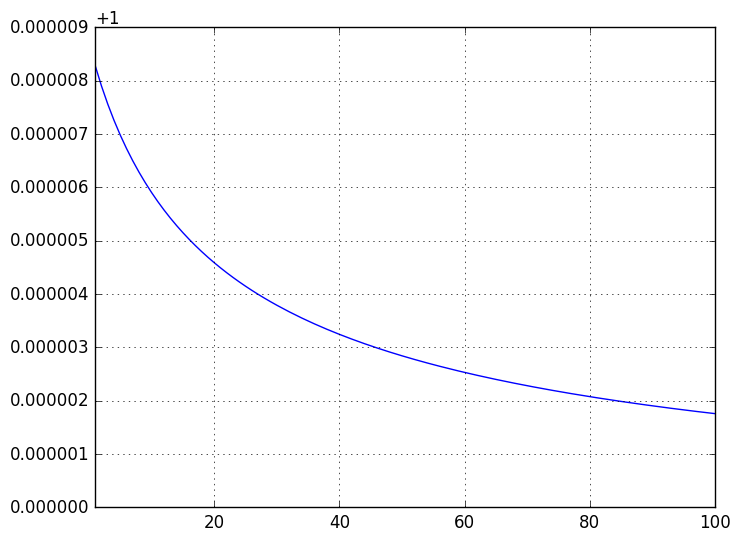

In [9]:
plot(1:1:1000, [fast_ltr(lxi) for lxi in 1:1:1000])
#hold(true)
#plot(1:1:1000, [fast_dltr(lxi)-1.0 for lxi in 1:1:1000],"--r")
#plot(1:1:1000, [fast_dltrp(lxi)-1.0 for lxi in 1:1:1000],":k")
xlim(1,100)
grid(true)

In [10]:
function full_fermat(rs, tgα, N=100; reltol=1e-21, abstol=1e-21, ext=1.0, tr=true)
    function f(x,yvec)
        (y, v) = yvec
        y_prime = v

        r = sqrt(x*x+y*y)
        eta = tr? fast_ltr(r) : fast_l(r)
        deta = tr? fast_dltr(r) : fast_dl(r)
        y_prime2 = y_prime*y_prime
        yp1 = y_prime2+1.0
        
        _a = eta*r*(1-y_prime2/yp1/yp1)
        _b = (y*y_prime+x)*y_prime*deta + yp1*y*deta
        
        v_prime = _b/_a
        [y_prime, v_prime]
    end
    _x = linspace(0.0,1,div(N,2)).^2
    _l = [-reverse(_x)*rs ; _x*rs.*ext]
    x, u = ode45(f, [0.0; tgα], _l; reltol=reltol, abstol=abstol)
    y = map(u -> u[1], u);
    dy = map(u -> u[2], u);    
    x,y
end
function full_fermat_p(rs, tgα, N=100; reltol=1e-21, abstol=1e-21, ext=1.0, tr=true)
    function f(x,yvec)
        (y, v) = yvec
        y_prime = v

        r = sqrt(x*x+y*y)
        eta = tr? fast_ltrp(r) : fast_l(r)
        deta = tr? fast_dltrp(r) : fast_dl(r)
        y_prime2 = y_prime*y_prime
        yp1 = y_prime2+1.0
        
        _a = eta*r*(1-y_prime2/yp1/yp1)
        _b = (y*y_prime+x)*y_prime*deta + yp1*y*deta
        
        v_prime = _b/_a
        [y_prime, v_prime]
    end
    _x = linspace(0.0,1,div(N,2)).^2
    _l = [-reverse(_x)*rs ; _x*rs.*ext]
    x, u = ode45(f, [0.0; tgα], _l; reltol=reltol, abstol=abstol)
    y = map(u -> u[1], u);
    dy = map(u -> u[2], u);    
    x,y
end

full_fermat_p (generic function with 2 methods)

In [11]:
rs = 1.0e6
b = 3.0
tgα = b/rs
N = 100000
x, y = full_fermat(rs, tgα, N; reltol=1e-19, abstol=1e-19);

In [12]:
θ = 0.0
nx,ny,_ = numeric_el(m, rho, θ, rs, tgα, N; abstol=1.0e-16, reltol=1.0e-17, ϕm=π);

In [13]:
function phi(x,y)
    r = sqrt(x*x+y*y)
    tnfw_potential(mvir, rscale, r, rvir);
end
function force(x,y)
    const r = sqrt(x*x+y*y)
    const gmr3 = G*tnfw_m(mvir, rscale, r, rvir)/r/r/r
    gmr3*x, gmr3*y
end
fx, fy = fermat(phi, force, rs, tgα, N; abstol=1e-15, reltol=1e-15, ext=1.3);

In [14]:
#px, py = full_fermat_p(rs, tgα, N; reltol=1e-19, abstol=1e-19);

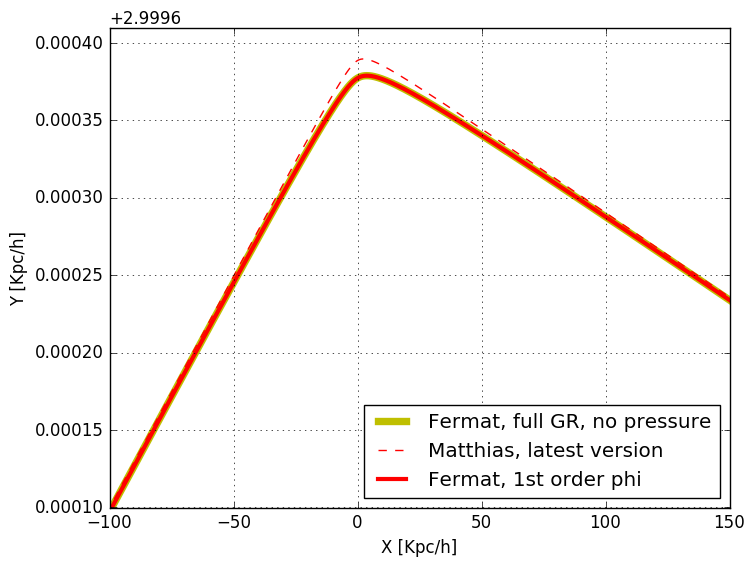

PyObject <matplotlib.legend.Legend object at 0x7f4d184b3828>

In [16]:
plot(x,y,"-y", lw=5.3, label="Fermat, full GR, no pressure")
hold(true)
plot(nx,ny,"--r", label="Matthias, latest version")
plot(fx,fy,"-r",lw=3.0, label="Fermat, 1st order phi")
#plot(px,py,"-k", label="Fermat, full GR, pressure")
xlim(-100,150)
ylim(2.9997,3.00001)
grid(true)
xlabel("X [Kpc/h]")
ylabel("Y [Kpc/h]")
legend(loc=4)